 __Analyse__

Toutes les analyses ici sont les mêmes que dans mon notebook de 'nettoyage'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fonctions pca

In [2]:
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()



# Load Data

In [3]:
df = pd.read_csv('./dataset_for_analysis.csv')

In [4]:
df=df.set_index('Unnamed: 0').rename(columns={'Unnamed: 0':'index'})

In [5]:
df.shape

(88292, 19)

In [6]:
df.head()

,index,code,product_name,main_category_fr,main_category,nutrition_grade_fr,countries_fr,ingredients_text,nutrition-score-fr_100g,proteins_100g,sodium_100g,salt_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,product_name_original,main_category_stemmed,product_name_clean
Unnamed: 0,,,,,,,,,,,,,,,,,,,
0,8,1071894,Flute,Pains,['breads'],NaN,Royaume-Uni,Wheat,1.0,9.30,0.472441,1.200000,4.7,0.7,52.00,4.0,Flute,bread,flute
1,11,5200016,green lentils,Aliments et boissons à base de végétaux,"['plant', 'based', 'foods', 'beverages']",NaN,France,lentilles vertes,0.0,9.00,0.047244,0.120000,3.4,0.7,48.55,2.5,lentilles vertes,plant base food beverag,green lentil
2,13,7730009,Shortbread biscuits with cocoa filling,Sablés,['sands'],NaN,France,"Sucre, farine de _Blé_, graisse et huiles végé...",20.0,6.30,0.220472,0.560000,23.6,13.6,62.65,25.0,Biscuits sablés fourrage au cacao,sand,shortbread biscuit cocoa fill
3,14,9336247,candi,Bonbons,['candies'],NaN,France,NaN,14.0,2.30,0.019700,0.050019,0.5,0.2,81.00,56.4,NaN,candi,candi
4,15,10090206,Cinnamon orange flavored Christmas tea,Thés,['teas'],NaN,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",2.0,0.23,0.000000,0.000000,0.0,0.0,0.50,0.5,Thé de Noël aromatisé orange-cannelle,tea,cinnamon orang flavor christma tea


# Exploration data

In [7]:
def make_pie_chart(column):
    plt.style.use('seaborn-notebook')
    count_unique = pd.DataFrame(df[column].value_counts()).reset_index() 
    plt.figure(figsize=(8,8))
    plt.pie(count_unique.iloc[:20, 1], labels = count_unique.iloc[:20, 0])
    plt.title(f"Camenbert des 20 {column} les plus fréquents");

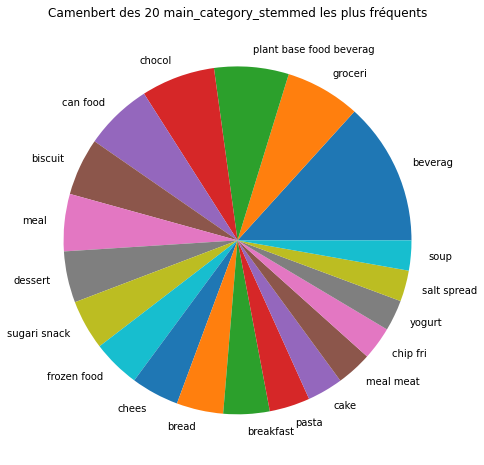

In [8]:
make_pie_chart('main_category_stemmed')

# Analyse des features

## corrélation au nutriscore

<AxesSubplot:>

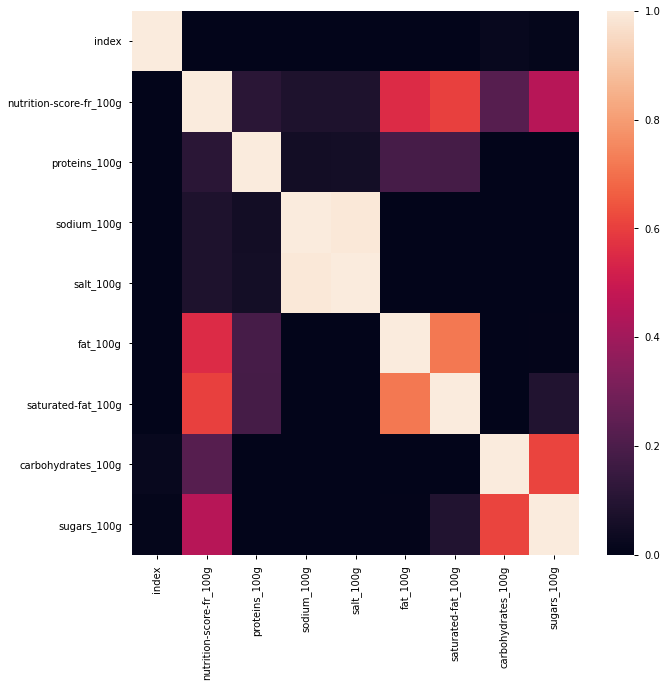

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),  vmin=0, vmax=1)

On voit que les élements les plus corrélés au nutriscore sont la gaisse, les graisses saturés, les carbonydrates et le sugre

In [10]:
print('corrélation fat satured fat')
print(df['saturated-fat_100g'].corr(df['fat_100g']))

corrélation fat satured fat
0.7171627194991519


In [11]:
print('correlation sucre et carbonhydrate')
print(df['sugars_100g'].corr(df['carbohydrates_100g']))

correlation sucre et carbonhydrate
0.6097008904265836


In [12]:
#print('correlation sodium et sel')
#print(df['sodium_100g'].corr(df['salt_100g']))

## Anova

Hypothese :
- H0 : Le pays d'origine n'influe pas sur le nutriscore moyen
- H1 : le pays influ sur le nutriscore\
alpha = 0.05


In [13]:
colonnes_anova = ['countries_fr', 'nutrition-score-fr_100g']
selection_test_anova = df[colonnes_anova]
selection_test_anova.dropna()
print(selection_test_anova.shape)
selection_test_anova.head(2)

(88292, 2)


,countries_fr,nutrition-score-fr_100g
Unnamed: 0,,
0,Royaume-Uni,1.0
1,France,0.0


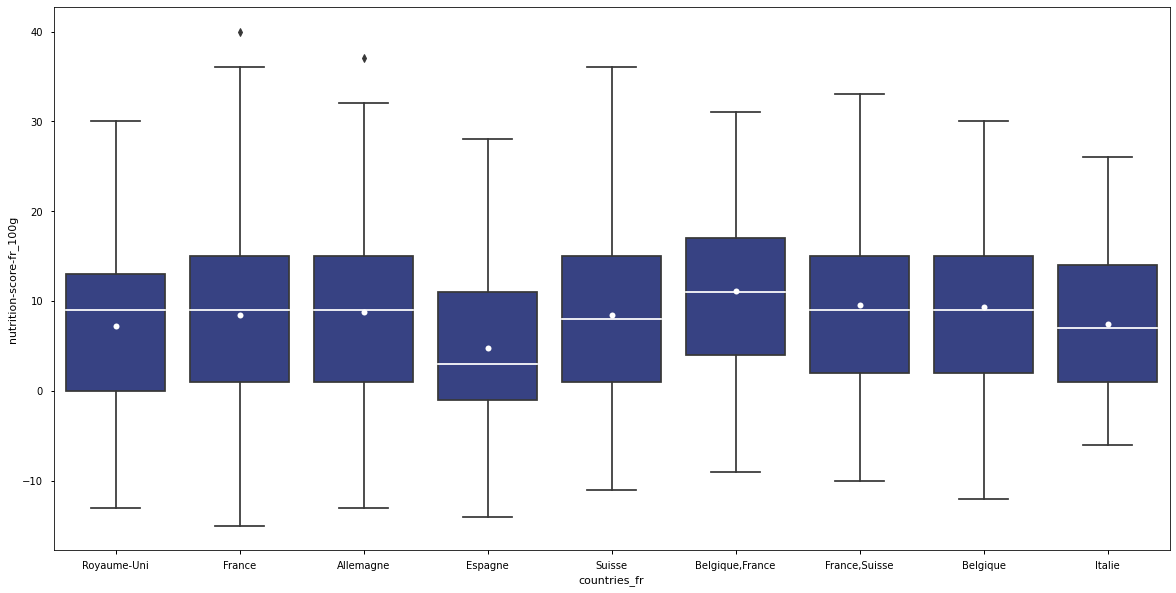

In [14]:
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'white'}
medianprops = {'color':"white"}
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='countries_fr', y='nutrition-score-fr_100g', data=selection_test_anova, color='#2a3990',
                meanprops=meanprops, showmeans=True, medianprops=medianprops)

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

selection_test_anova=selection_test_anova.rename(columns={'countries_fr':'countries_fr', 'nutrition-score-fr_100g':'nutrition_score_fr_100g'})

# ANOVA Test 
model = ols('nutrition_score_fr_100g ~ countries_fr', data=selection_test_anova).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

,sum_sq,df,F,PR(>F)
countries_fr,5.705543e+04,8.0,97.750701,8.464597e-163
Residual,6.441161e+06,88283.0,NaN,NaN


La p value étant très largement inferieur à 0.05 et la F stat etant grande (significatif), on peut rejetter h0 et adopter h1 : le pays influ sur le nutriscore.

### pca

In [16]:
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
N_COMP=6

In [17]:
df.columns

Index(['index', 'code', 'product_name', 'main_category_fr', 'main_category',
       'nutrition_grade_fr', 'countries_fr', 'ingredients_text',
       'nutrition-score-fr_100g', 'proteins_100g', 'sodium_100g', 'salt_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'product_name_original', 'main_category_stemmed', 'product_name_clean'],
      dtype='object')

In [18]:
columns_numeric_selected=['nutrition-score-fr_100g', 'proteins_100g', 'salt_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g']

In [19]:
X=df[columns_numeric_selected].values
features = df[columns_numeric_selected].columns

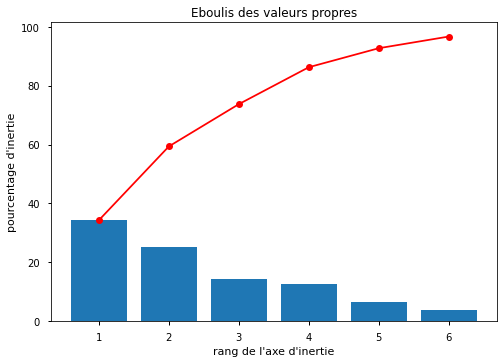

In [20]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
pca=decomposition.PCA(n_components=N_COMP)
pca.fit(X_scaled)
display_scree_plot(pca)

Si on veut expliquer au moins 95% de la donnée, il faut prendre 6 composantes..

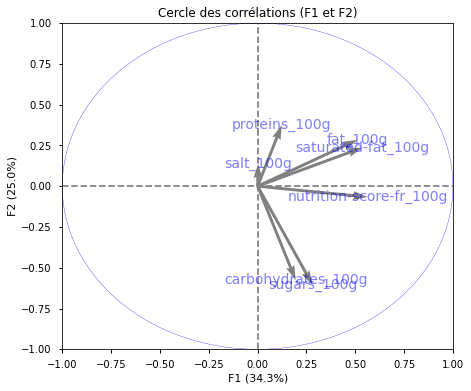

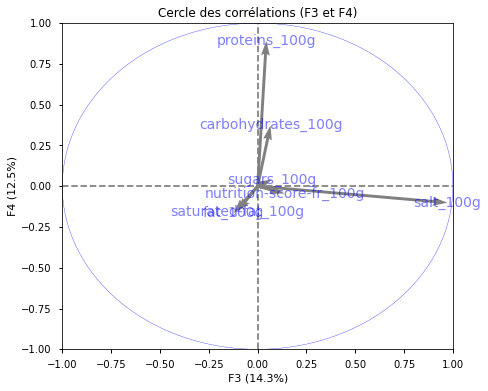

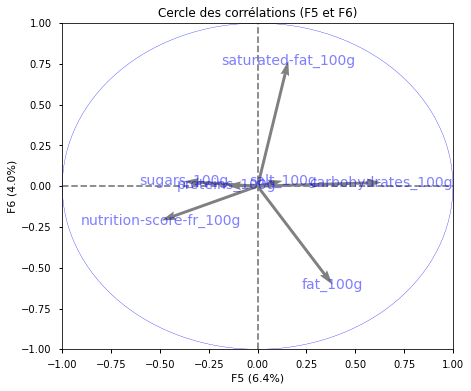

In [21]:
pcs=pca.components_
display_circles(pcs, N_COMP, pca, [(0,1),(2,3),(4,5)], labels=np.array(features))

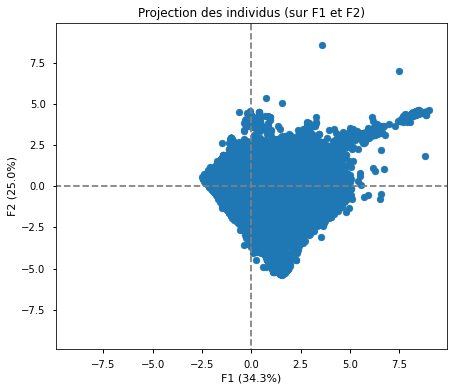

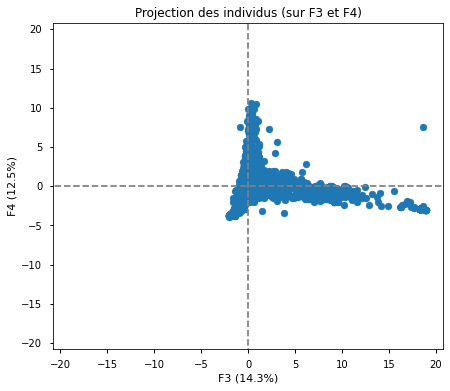

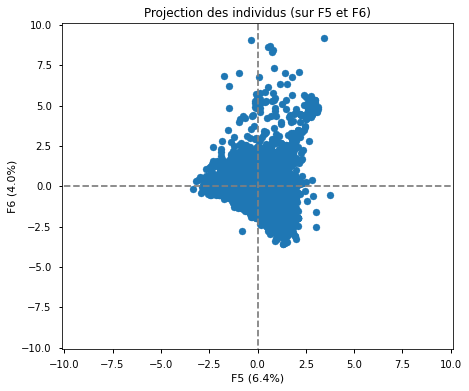

In [22]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, N_COMP, pca, [(0,1),(2,3),(4,5)],)# labels = np.array(names))

plt.show()